In [59]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Step 1:  Read in the `stock_data.csv` file and create a DataFrame.

In [62]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("../Proj_2/heart_failure_clinical_records.csv")

# Review the DataFrame
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [64]:
# Get the shape of the DataFrame
df.shape

(5000, 13)

In [66]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [68]:
# Get the information on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


### Scale the DataFrame and create a new DataFrame that contains the scaled data. 

In [96]:
# Use the standard scaler, fit_transform to scale the numerical columns.
scale_columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',"DEATH_EVENT"]
df_data_scaled = StandardScaler().fit_transform(df[scale_columns])

In [104]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
df_heartdata_scaled = pd.DataFrame(
    df_data_scaled,
    columns=scale_columns)
df_heartdata_scaled.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926


In [106]:
# Create a DEATH_EVENT column in the df_heartdata_scaled DataFrame
# using the index of the original df DataFrame
df_heartdata_scaled["index"] = df.index

In [108]:
# Set the newly created DEATH_EVENT column as index of the df_stocks_scaled DataFrame
df_heartdata_scaled = df_heartdata_scaled.set_index("index")
df_heartdata_scaled.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
index,,,,,,,,,,,,,
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926
3,-0.024687,1.052581,0.171240,1.129527,0.196757,1.319556,0.642154,-0.167490,-2.421306,0.740909,-0.673102,-0.526122,-0.675926
4,2.967771,1.052581,-0.004874,-0.885327,-0.671773,-0.757831,1.999435,0.624865,-1.077157,0.740909,-0.673102,-1.043465,1.479451


In [112]:
# Encode the DEATH EVENT column
deathevent_encoded_df = pd.get_dummies(df["DEATH_EVENT"])

# Review the DataFrame
deathevent_encoded_df.head()

,0,1
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True


In [116]:
# Concatenate the `DEATH EVENT` encoded DataFrame with the scaled data DataFrame
scaled_encoded = pd.concat([df_heartdata_scaled, deathevent_encoded_df], axis=1)

# Display the sample data
scaled_encoded.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,0,1
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926,True,False
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926,True,False
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926,True,False
3,-0.024687,1.052581,0.171240,1.129527,0.196757,1.319556,0.642154,-0.167490,-2.421306,0.740909,-0.673102,-0.526122,-0.675926,True,False
4,2.967771,1.052581,-0.004874,-0.885327,-0.671773,-0.757831,1.999435,0.624865,-1.077157,0.740909,-0.673102,-1.043465,1.479451,False,True


### Initialize the K-means model with three clusters and then fit the DataFrame to the model.

In [128]:
scaled_encoded.columns = scaled_encoded.columns.astype(str)
scaled_encoded.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', '0', '1'],
      dtype='object')

In [130]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, random_state=1)

In [132]:
# Fit the model for the scaled_encoded_stocks DataFrame
model.fit(scaled_encoded)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

### Predict the clusters and then create a new DataFrame with the predicted clusters.

In [134]:
# Create a copy of the scaled_encoded_stocks DataFrame and name it as heart_scaled_predictions
heart_scaled_predictions = scaled_encoded.copy()

# Predict the model segments (clusters)
df_clusters = model.predict(heart_scaled_predictions)

# Create a new column in the DataFrame with the predicted clusters
heart_scaled_predictions["HeartDiseaseDeathCluster"] = df_clusters

# Review the DataFrame
heart_scaled_predictions.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,0,1,HeartDiseaseDeathCluster
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926,True,False,0
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926,True,False,0
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926,True,False,2
3,-0.024687,1.052581,0.171240,1.129527,0.196757,1.319556,0.642154,-0.167490,-2.421306,0.740909,-0.673102,-0.526122,-0.675926,True,False,0
4,2.967771,1.052581,-0.004874,-0.885327,-0.671773,-0.757831,1.999435,0.624865,-1.077157,0.740909,-0.673102,-1.043465,1.479451,False,True,1


### Step 5: Create a scatter plot to visualize the Clusters

<Axes: xlabel='sex', ylabel='smoking'>

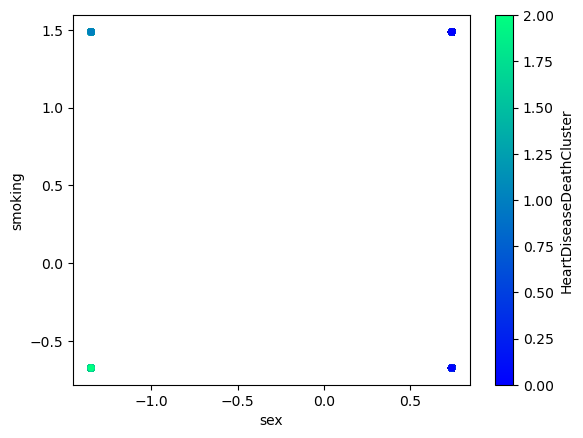

In [142]:
heart_scaled_predictions.plot.scatter(
    x="sex",
    y="smoking",
    c="HeartDiseaseDeathCluster",
    colormap='winter')

### Reduce the number of features to two principal components on the `df_heart_pca` DataFrame, and  calculate the explained variance ratio that results from the PCA data.

In [145]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [147]:
# Fit the scaled_encoded_stocks data to the PCA
heartdisease_pca_data = pca.fit_transform(scaled_encoded)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
heartdisease_pca_data[:5]

array([[-0.59803844,  1.94691815],
       [ 0.82790238,  0.92147872],
       [-2.28801242, -0.93738525],
       [ 0.40799659, -0.81882863],
       [ 3.102463  , -0.15959155]])

In [149]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.17915215, 0.11879202])

### Use the calculate PCA DataFrame to create a new DataFrame called, `df_heart_pca`

In [151]:
# Creating a DataFrame with the PCA data
df_heart_pca = pd.DataFrame(heartdisease_pca_data, columns=["PCA1", "PCA2"])

# NOTE: I COMMENTED THIS OUT BC I DONT THINK WE NEED TO CREATE AN INDEX FOR THIS DATASET. WHEN YOU VIEW IT, A INDEX ALREADY IS AVAILABLE.
# Copy the tickers names from the original data
#df_heart_pca[""] = df.index

# Set the Ticker column as index
#df_heart_pca = df_stocks_pca.set_index("")

# Review the DataFrame
df_heart_pca.head()

,PCA1,PCA2
0,-0.598038,1.946918
1,0.827902,0.921479
2,-2.288012,-0.937385
3,0.407997,-0.818829
4,3.102463,-0.159592


### Rerun the K-means algorithm on the `df_heart_pca` DataFrame and create a scatter plot using the  "Clusters" and the two principal components for the x- and y-axes.

In [153]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, random_state=1)

# Fit the model for the df_heart_pca DataFrame
model.fit(df_heart_pca)

# Predict the model segments (clusters)
heartdisease_clusters = model.predict(df_heart_pca)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [161]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_heartdisease_pca_predictions
df_heartdisease_pca_predictions = df_heart_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_heartdisease_pca_predictions["Clusters"] = heartdisease_clusters

# Review the DataFrame
df_heartdisease_pca_predictions.head()

,PCA1,PCA2,Clusters
0,-0.598038,1.946918,2
1,0.827902,0.921479,1
2,-2.288012,-0.937385,0
3,0.407997,-0.818829,0
4,3.102463,-0.159592,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

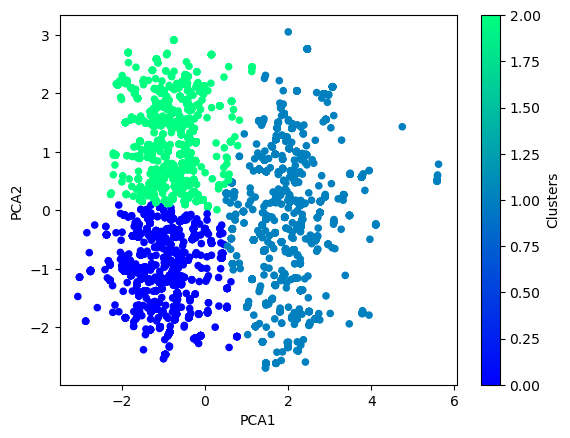

In [165]:
# Create the scatter plot with x="PCA1" and y="PCA2"
df_heartdisease_pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="Clusters",
    colormap='winter')

**Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?



**Answer:** We can conclude that using less features we can more clearly identify three clusters.

### Determine which features have the strongest influence on each componen, and plot the most influencial features for each component.

In [167]:
# Use the columns from the scaled and encoded DataFrame in step 2.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=scaled_encoded.columns)
pca_component_weights

,PCA1,PCA2
age,0.271996,-0.038875
anaemia,0.084001,-0.291338
creatinine_phosphokinase,0.020885,0.165746
diabetes,-0.032418,-0.296249
ejection_fraction,-0.232514,-0.123530
high_blood_pressure,0.107820,-0.199937
platelets,-0.046375,-0.068387
serum_creatinine,0.328754,-0.010545
serum_sodium,-0.256598,-0.036799
sex,0.097112,0.617637


### Which features have the strongest influence on each component? 
--- 
**Answer:** 


### Create a scatterplot of the most influential features for each principal component and stock cluster.

<Axes: xlabel='high_blood_pressure', ylabel='diabetes'>

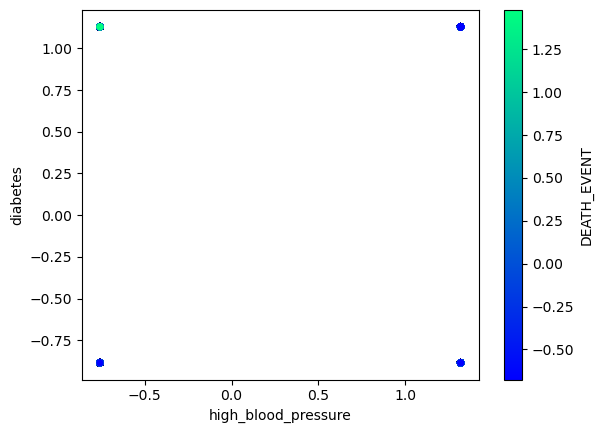

In [171]:
# Plot the features that have the strongest influence on each component. 
heart_scaled_predictions.plot.scatter(
    x="high_blood_pressure",
    y="diabetes",
    c="DEATH_EVENT",
    colormap='winter')

### Results

**Answer:** 